# REQUIRED PACKAGES AND DEPENDENCIES

In [1]:
# =========================================
# 📦 Install & Import Required Libraries
# =========================================
!pip install qiskit qiskit-aer pylatexenc --upgrade -q

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from math import pi
import matplotlib.pyplot as plt

# Initialize the simulator
sim = AerSimulator()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 85.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 90.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 87.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.4 MB/s eta 0:00:00


# GIVEN CIRCUIT

Original Quantum Circuit:


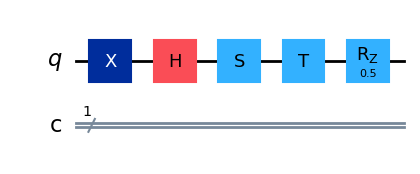


Measurement Counts: {'0 0': 491, '1 0': 533}


In [2]:

# =========================================
# 🧩 CIRCUIT DEFINITION
# =========================================
qc = QuantumCircuit(1, 1)

qc.x(0)      # Pauli-X (NOT gate)
qc.h(0)      # Hadamard (creates superposition)
qc.s(0)      # Phase gate (π/2)
qc.t(0)      # T gate (π/4)
qc.rz(0.5, 0)  # Rotate around Z-axis by 0.5 radians

print("Original Quantum Circuit:")
display(qc.draw('mpl'))
qc.measure_all()

# Transpile and run
compiled = transpile(qc, sim)
result = sim.run(compiled, shots=1024).result()
counts = result.get_counts()

print("\nMeasurement Counts:", counts)

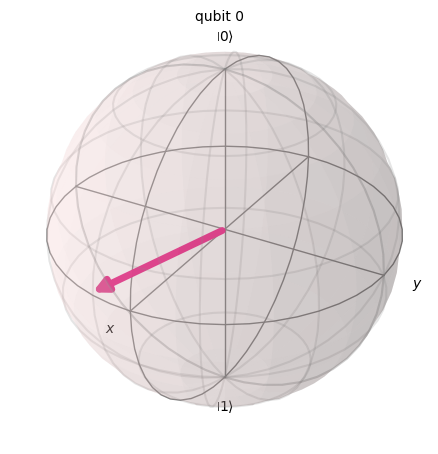

In [3]:
# Create a new state from the circuit *without* measurements
state = Statevector.from_instruction(qc.remove_final_measurements(inplace=False))

# Plot the Bloch sphere
plot_bloch_multivector(state)

# TASK 1: Change Gate Order (Swap X and H)

🔹 Circuit After Swapping X and H Gates:


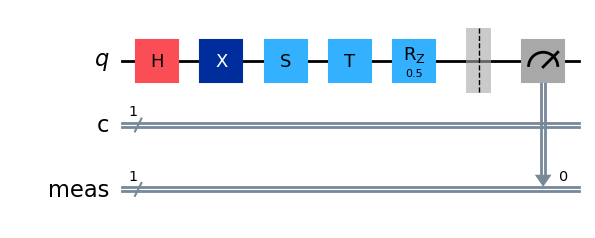


Measurement Counts (after swapping): {'0 0': 506, '1 0': 518}


In [4]:
# =========================================
# 🔄 TASK 1: Change Gate Order (Swap X and H)
# =========================================
qc_swap = QuantumCircuit(1, 1)

qc_swap.h(0)      # Swapped order: H first
qc_swap.x(0)      # Then X gate
qc_swap.s(0)
qc_swap.t(0)
qc_swap.rz(0.5, 0)

# We will add measurement just for the simulation part
qc_for_sim = qc_swap.copy()
qc_for_sim.measure_all()

print("🔹 Circuit After Swapping X and H Gates:")
display(qc_for_sim.draw('mpl'))

# Run the simulation and get counts
compiled = transpile(qc_for_sim, sim)
result = sim.run(compiled, shots=1024).result()
counts = result.get_counts()
print("\nMeasurement Counts (after swapping):", counts)

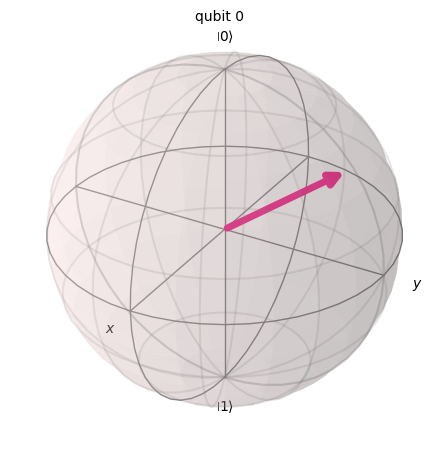

In [5]:
# Visualize the state of the original circuit *without* measurements
state_swap = Statevector.from_instruction(qc_swap)
plot_bloch_multivector(state_swap)

In [6]:
# =====================================================
# 🧠 EXPLANATION: Why Gate Order Affects the Final State
# =====================================================
"""
1️⃣ Quantum gates are *unitary matrices*, and most of them do NOT commute.
    That means A·B ≠ B·A, so swapping their order gives a different result.

2️⃣ The X (Pauli-X) gate flips |0⟩ ↔ |1⟩.
    The H (Hadamard) gate creates a superposition:
        H|0⟩ = (|0⟩ + |1⟩)/√2
        H|1⟩ = (|0⟩ - |1⟩)/√2

   Therefore:
        X → H : first flip, then superpose → results in |–⟩-like state
        H → X : first superpose, then flip → results in |+⟩-like state
   These two are *not the same quantum state.*

3️⃣ On the Bloch sphere:
    - X rotates the qubit 180° around the X-axis.
    - H rotates it around a diagonal axis (Z↔X mixing).
    Since rotations in 3D space don't commute,
    the final orientation depends on the order of rotation.

4️⃣ In measurements:
    This order difference changes the interference pattern,
    so the observed probabilities for '0' and '1' differ.

🧭 Analogy:
    Imagine rotating a Rubik’s Cube — turn left then up ≠ up then left.
    That’s exactly how quantum gates behave!

✅ Conclusion:
    Gate order matters because quantum gates act as *non-commutative rotations*.
    Changing the sequence changes the final qubit state and measurement outcomes.
"""

"\n1️⃣ Quantum gates are *unitary matrices*, and most of them do NOT commute.\n    That means A·B ≠ B·A, so swapping their order gives a different result.\n\n2️⃣ The X (Pauli-X) gate flips |0⟩ ↔ |1⟩.\n    The H (Hadamard) gate creates a superposition:\n        H|0⟩ = (|0⟩ + |1⟩)/√2\n        H|1⟩ = (|0⟩ - |1⟩)/√2\n\n   Therefore:\n        X → H : first flip, then superpose → results in |–⟩-like state\n        H → X : first superpose, then flip → results in |+⟩-like state\n   These two are *not the same quantum state.*\n\n3️⃣ On the Bloch sphere:\n    - X rotates the qubit 180° around the X-axis.\n    - H rotates it around a diagonal axis (Z↔X mixing).\n    Since rotations in 3D space don't commute,\n    the final orientation depends on the order of rotation.\n\n4️⃣ In measurements:\n    This order difference changes the interference pattern,\n    so the observed probabilities for '0' and '1' differ.\n\n🧭 Analogy:\n    Imagine rotating a Rubik’s Cube — turn left then up ≠ up then left.\n

# TASK 2: Vary Rotation Angle (θ = π/4, π/2, π)


🔹 Circuit for Rotation Angle θ = 0.79 radians:


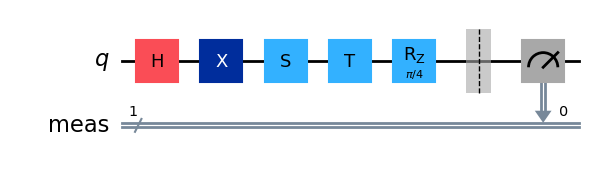

Measurement Counts: {'0': 527, '1': 497}

🔹 Circuit for Rotation Angle θ = 1.57 radians:


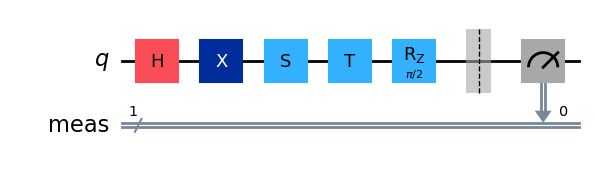

Measurement Counts: {'1': 537, '0': 487}

🔹 Circuit for Rotation Angle θ = 3.14 radians:


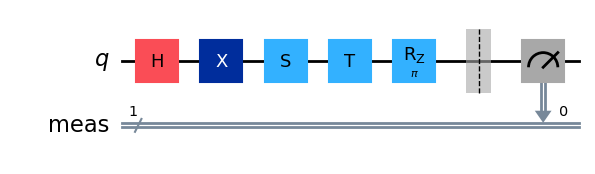

Measurement Counts: {'1': 501, '0': 523}

✅ Calculations complete. States are stored for plotting.


In [7]:
# Dictionary to hold the statevectors for plotting later
states_to_plot = {}

# ====================================================
# 🔁 TASK 2: Vary Rotation Angle (θ = π/4, π/2, π)
# ====================================================
for angle in [pi/4, pi/2, pi]:
    qc_angle = QuantumCircuit(1) # No need for classical bit here
    qc_angle.h(0)
    qc_angle.x(0)
    qc_angle.s(0)
    qc_angle.t(0)
    qc_angle.rz(angle, 0)

    # --- Part 1: Simulation ---
    # We create a temporary copy of the circuit for measurement
    qc_sim = qc_angle.copy()
    qc_sim.measure_all()

    print(f"\n🔹 Circuit for Rotation Angle θ = {angle:.2f} radians:")
    display(qc_sim.draw('mpl'))

    compiled = transpile(qc_sim, sim)
    result = sim.run(compiled, shots=1024).result()
    counts = result.get_counts()
    print("Measurement Counts:", counts)

    # --- Part 2: Store the state for plotting later ---
    # We use the original circuit without measurement
    state_angle = Statevector.from_instruction(qc_angle)
    states_to_plot[f"θ = {angle:.2f}"] = state_angle

print("\n✅ Calculations complete. States are stored for plotting.")

Bloch Sphere for θ = 0.79


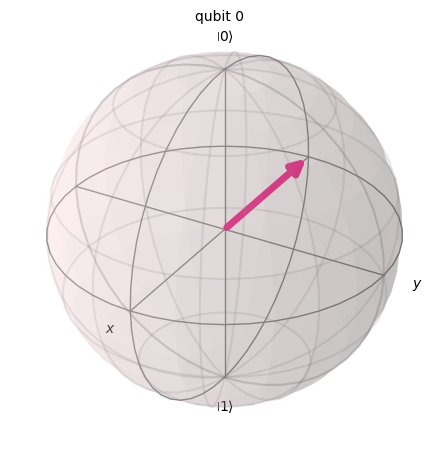

Bloch Sphere for θ = 1.57


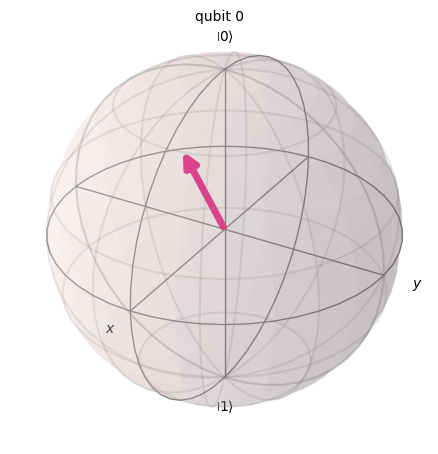

Bloch Sphere for θ = 3.14


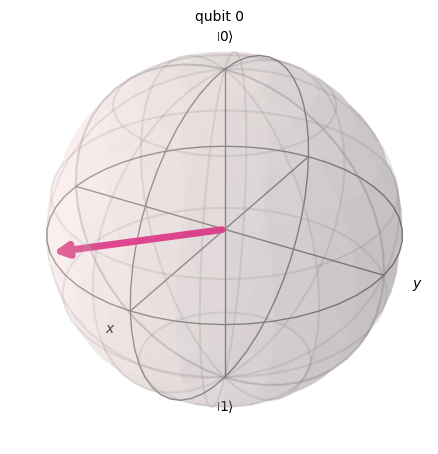

In [8]:
# Now, iterate and plot the states we saved
for title, state in states_to_plot.items():
    print(f"Bloch Sphere for {title}")
    display(plot_bloch_multivector(state))

# TASK 3: Remove the Hadamard Gate

🔹 Circuit Without Hadamard Gate:


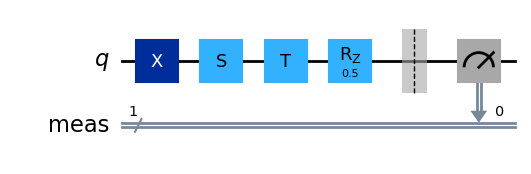

Measurement Counts (without H): {'1': 1024}


In [9]:
# =========================================
# ❌ TASK 3: Remove the Hadamard Gate
# =========================================
qc_noH = QuantumCircuit(1) # Define circuit without classical bit for now

qc_noH.x(0)
qc_noH.s(0)
qc_noH.t(0)
qc_noH.rz(0.5, 0)

# --- Run Simulation ---
# Create a copy of the circuit and add measurements just for simulation
qc_sim = qc_noH.copy()
qc_sim.measure_all()

print("🔹 Circuit Without Hadamard Gate:")
display(qc_sim.draw('mpl'))

compiled = transpile(qc_sim, sim)
result = sim.run(compiled, shots=1024).result()
counts = result.get_counts()
print("Measurement Counts (without H):", counts)

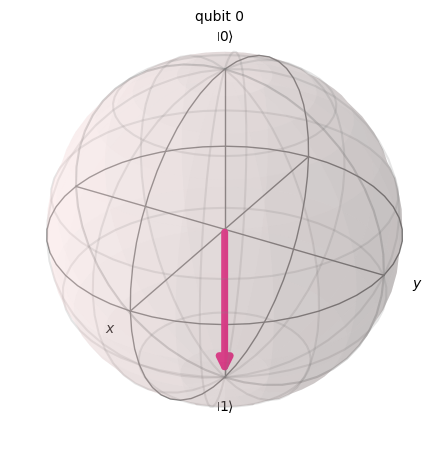

In [10]:
# Now, visualize the state of the original circuit (without measurements)
state_noH = Statevector.from_instruction(qc_noH)
plot_bloch_multivector(state_noH)